# Assignment 1 - Group 3
### Carl Anton Schmidt (s204154), Julius H. Radzikowski (s204162)

Link to our [repository](https://github.com/radziko/CompSocSci/)

Contributions were as follows:

Julius %%
Carl %%

# Formalia:

Please read the [assignment overview page](https://laura.alessandretti.com/comsocsci2023/assignments.html) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Feb 28th at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Assignment, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository (if you don't have a shared Git repository, it's fine. Remember to do it next time)
* group members' contributions

## Part 1: Using web-scraping to gather data

Gather the list of researchers that have joined the most important scientific conference in Computational Social Science in 2019. 

You can find the programmes of the 2019 edition at the links below:  
>Oral presentations: https://2019.ic2s2.org/oral-presentations/    
> Poster presentations: https://2019.ic2s2.org/posters/    

1. Inspect the HTML of the pages above and use web-scraping to get the set of participants in 2019. Share your code and add comments to guide us through it.
2. How many unique researchers you got in 2019?
3. Explain one or two decisions you took during the web-scraping exercise, for 2019 or any other year. Why did you take this choice? How might your decision impact the final number of authors?

### Solution (Part 1)

In this task we will webscrape the two websites to gather all the researchers of 2019. The solution will use "Beatiful Soup", which is a python package for parsing HTML documents. Also, we will use "Requests" to do requests for the web-pages. Pandas is nice for formatting the data in so-called dataframes. "re" is a package for formatting strings.

In [14]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd
import re


#### Poster session

Now we use the first two packages to obtain the raw data of the webpage. 

In [6]:
LINK = "https://2019.ic2s2.org/posters/"
r = requests.get(LINK)
soup = BeautifulSoup(r.content) 
soup

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<title>All poster presentations – 5th International Conference on Computational Social Science</title>
<meta content="max-image-preview:large" name="robots"/>
<link href="//platform.twitter.com" rel="dns-prefetch"/>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="https://2019.ic2s2.org/feed/" rel="alternate" title="5th International Conference on Computational Social Science » Feed" type="application/rss+xml"/>
<link href="https://2019.ic2s2.org/comments/feed/" rel="alternate" title="5th International Conference on Computational Social Science » Comments Feed" type="application/rss+xml"/>
<!-- This site uses the Google Analytics by ExactMetrics plugin v7.12.1 - Using Analytics tracking - https://www.exactmetrics.com/ -->
<script async="" data-cfasync="false" data-wpfc-render="fal

The class where the data is placed is called "col-md-8". We obtain that data with "soup.find":

In [9]:
class_name =  "col-md-8"
table = soup.find("div",{"class": class_name})
table

<div class="col-md-8 page-content-wrap">
<div class="row"><div class="col-md-12"><h1 class="hestia-title title-in-content">All poster presentations</h1></div></div><p><a name="thursday"></a>All poster presentations take place in the centrall hall of the conference venue.</p>
<p style="text-align: center;"><strong>Thursday July 18</strong> – <a href="#friday">Friday July 19</a></p>
<h4>Thursday July 18 (15:00-16:30)</h4>
<ul>
<li>Frank Peter Pijpers<span> </span><strong>Hypothesis testing of causality between time series</strong></li>
<li>Martin Lukac and André Grow<span> </span><br/>
<strong>Recruiting mechanisms on online labour markets: an agent-based model</strong></li>
<li>Kiran Garimella, Gianmarco De Francisci Morales, Aristides Gionis and Michael Mathioudakis<span> </span><br/>
<strong>Political Discourse on Social Media: Echo Chambers, Gatekeepers, and the Price of Bipartisanship</strong></li>
<li>Eaman Jahani, Peter Krafft, Yoshihiko Suhara, Esteban Moro and Alex Pentland<span

It should be quite visiable from the above, that the names are stored in list elements (\<li\>). We find these elements and show the first 5 elements:

In [11]:
table_rows = table.find_all('li')
table_rows[0:5]

[<li>Frank Peter Pijpers<span> </span><strong>Hypothesis testing of causality between time series</strong></li>,
 <li>Martin Lukac and André Grow<span> </span><br/>
 <strong>Recruiting mechanisms on online labour markets: an agent-based model</strong></li>,
 <li>Kiran Garimella, Gianmarco De Francisci Morales, Aristides Gionis and Michael Mathioudakis<span> </span><br/>
 <strong>Political Discourse on Social Media: Echo Chambers, Gatekeepers, and the Price of Bipartisanship</strong></li>,
 <li>Eaman Jahani, Peter Krafft, Yoshihiko Suhara, Esteban Moro and Alex Pentland<span> </span><br/>
 <strong>ScamCoins, S*** Posters, and the Search for the Next Bitcoin TM : Collective Sensemaking in Cryptocurrency Discussions</strong></li>,
 <li>Gabriel Murray<span> </span><br/>
 <strong>Predicting Small Group Interaction Dynamics with Social Network Analysis</strong></li>]

Now to getting the names. We iterate through the rows, while being aware that the format of the rows is not constant. Especially, some titles are both list elements and strong. This is taken care of when defining "s". First, we get the content of the row (some rows only containing title names). The names are stored in the first element "[0]". By using "text", the strong class is not included. 

Thereafter, we split of ", " and " and ". The space is included to avoid the first and last part of the name string being a space. 

Also, we iterate through all rows in tablerows, but the one somehow gets included while being a title. This is solved by not iterating over it. 

In [50]:
all_names = []
for row in table_rows[:-1]:
    s = row.contents[0].text
    names = re.split(', | and ', s)
    all_names.append(names)

all_names[:5]

[['Frank Peter Pijpers'],
 ['Martin Lukac', 'André Grow'],
 ['Kiran Garimella',
  'Gianmarco De Francisci Morales',
  'Aristides Gionis',
  'Michael Mathioudakis'],
 ['Eaman Jahani',
  'Peter Krafft',
  'Yoshihiko Suhara',
  'Esteban Moro',
  'Alex Pentland'],
 ['Gabriel Murray']]

All the names should have its own row:

In [46]:
from itertools import chain
name_list = list(chain.from_iterable(all_names))
name_list[:5]

['Frank Peter Pijpers',
 'Martin Lukac',
 'André Grow',
 'Kiran Garimella',
 'Gianmarco De Francisci Morales']

Let's found out how many we found from the poster session:

In [49]:
print("There are", len(name_list), "participants from the poster session").

There are 515 participants from the poster session


#### The oral session

In [52]:
LINK = "https://2019.ic2s2.org/oral-presentations/"
r = requests.get(LINK) 
soup = BeautifulSoup(r.content) 
#soup

In [53]:
class_name =  "col-md-8 page-content-wrap"
table = soup.find("div",{"class": class_name})

The relevant content is stored in paragraphs (\<p\>). We find all of these and note that many paragraphs excits which contain irrelevant information.

In [64]:
it_p = table.find_all('p') # tr
print(it_p[:5])
# it_p[3].text.split('.')[2].split('– ')[-1]  #.split('–')

[<p>Relevant (extended) abstracts of these talks can be found in the <a href="https://2019.ic2s2.org/program/">conference app</a>.</p>, <p><strong>Rooms per track during main conference</strong><br/>
<small><span style="color: black; background-color: rgb(229,2,18,0.7)"> A0.01 </span></small> Keynotes<br/>
<small><span style="color: black; background-color: rgb(243,12,185,0.7)"> A1.02 </span></small> Track A<br/>
<small><span style="color: black; background-color: rgb(97,7,207,0.7)"> A1.03 </span></small> Track B (except 1B on Thu)<br/>
<small><span style="color: black; background-color: rgb(30,237,18,0.7)"> C0.01 </span></small> Track C<br/>
<small><span style="color: black; background-color: rgb(0,134,255,0.7)"> C0.02 </span></small> Track D (except 1D &amp; 2D on Thu)<br/>
<small><span style="color: black; background-color: rgb(255,254,0,0.7)"> C1.03 </span></small> Track E<br/>
<small><span style="color: black; background-color: rgb(255,136,57,0.7)"> C1.04 </span></small> Track F<b

We wish to split every section divided by a number and a letter, since these are of the some format. Hence, obtaining a method for getting the names from one of these, should solve the overall problem. Every section contains "Chair" and we therefore split on this. 

In [69]:
sections = []
for para in it_p:
    if "Chair" in para.text:
        #print(para.text)
        #new_lists = para.text.split('.')
        sections.append(para.text)
sections[0:2]

['1A Misinformation – Thursday July 18, 11:00 – 12:30 Chair: Ziv Epstein11:00 – 11:15 – Jieyu Ding, Qiusi Sun, Jingwen Zhang. Classifying and Understanding the Semantic Structures of Vaccine Misinformation on Twitter11:15 – 11:30 – Mahmoudreza Babaei, Juhi Kulshrestha, Abhijnan Chakraborty, Elissa M. Redmiles, Meeyoung Cha, Krishna Gummadi. Analyzing Biases in Perception of Truth in News Stories and Their Implications for Fact Checking11:30 – 11:45 – Alexandre Bovet, Hernan Makse. Dynamics and influence of misinformation and traditional fact-based news in Twitter11:45 – 12:00 – Ziv Epstein, Mohsen Mosleh, Antonio Arechar, Gordon Pennycook, David Rand. Primed for accuracy: A cognitive approach to fighting misinformation on Twitter12:00 – 12:15 – Sunandan Chakraborty, Tarunima Prabhakar, Joyojeet Pal –Dissecting Fake News: Understanding the Dynamics of False Information spread in India12:15 – 12:30 – Gustavo Jota Resende, Philipe Melo, Hugo Sousa, Johnnatan Messias, Marisa Vasconcelos, J

Okay, now to the advanced part. It can be seen that the names are seperated from the title of their oral presentation with a dot. We therefore split of that for each text. Here it should be noted that people having middle-names, such as "Elissa M. Redmiles", will be treated wrongly - this is still the best solution from our part. The names are split from the time-range by a "- ", therefore splitting on that as well.

Now having elements looking like: 

    "Jieyu Ding, Qiusi Sun, Jingwen Zhang

    Mahmoudreza Babaei, Juhi Kulshrestha, Abhijnan Chakraborty, Elissa M

     Redmiles, Meeyoung Cha, Krishna Gummadi"

    ...

We split on ", " to get a list of names. A lot of mistakes are still present, for example:

    [' Redmiles', 'Meeyoung Cha', 'Krishna Gummadi']

    [' (Mis)Information Dissemination in WhatsApp: Gathering', 'Analyzing and Countermeasures']

    [' Valuing Art: Professional vs']

The first is a consequence of splitting on middle names. 
We see that all these rows are characterized by the first element being space. We decide to remove these rows, since there are many cases of the titles being present, while there are only few cases of middle names. 

 

In [101]:
all_names = []
for text in sections:
    for element in text.rsplit('.'):
        elements = element.split('– ')[-1]
        #print(elements)
        list_names = elements.split(', ')
        if list_names[0][0] != ' ':
            all_names.append(list_names)
        #all_names.append(list_names)
all_names[:3]

[['Jieyu Ding', 'Qiusi Sun', 'Jingwen Zhang'],
 ['Mahmoudreza Babaei',
  'Juhi Kulshrestha',
  'Abhijnan Chakraborty',
  'Elissa M'],
 ['Alexandre Bovet', 'Hernan Makse']]

To sum up the consequences: We lose the last name of persons having middlename and every co-author coming after a person with a middlename. We get the names individually:

In [104]:
name_list = list(chain.from_iterable(all_names))
name_list[:5]

['Jieyu Ding',
 'Qiusi Sun',
 'Jingwen Zhang',
 'Mahmoudreza Babaei',
 'Juhi Kulshrestha']

In [106]:
print("There are", len(name_list), "participants from the poster session")

There are 607 participants from the poster session


Observing a stored "csv"-file, there are a few mistakes, such are people names "Dr. XXX" and the "No Presentation" lines. However, we assess that these mistakes can easily be removed manually. 

**Conclusion**: In the end, we obtain 515+607 = 1122 participants, with a room for error.

## Part 2: Getting data from the Semantic Scholar API

> * Consider the list of author ids you have found in Week 2, Part 3, first excercise. For each author, use the Academic Graph API to find:
>    - their _aliases_
>    - their _name_
>    - their _papers_, where for each paper we want to retain: 
>        -  _title_ 
>        -  _abstract_ 
>        -  the _year_ of publication
>        -  the _externalIds_ (this is because there are universal identifiers for scientific works called DOI that we can use across platforms)
>        -  _s2FieldsOfStudy_ the fields of study
>        - _citationCount_ the number of times that this paper was cited    
> * Create three dataframe to store the data you have collected. 
>    
>    - **Author dataset:** in the author dataset, one raw is one unique author, and each row contains the following information: 
>        - *authorId*: (str) the id of the author
>        - *name*: (str) the name of the author
>        - *aliases*: (list) the aliases of the author
>        - *citationCount*: (int) the total number of citations received by an author
>        - *field*: (str) the _s2FieldsOfStudy_ that occurs most times across an author's papers (you should first obtain the *category* for each _s2FieldsOfStudy_)
>    - **Paper dataset:** in the paper dataset, one row is one unique paper, and each row contains the following information:
>        - *paperId*: (str) the id of the paper
>        - *title*: (str) the title of the paper
>        - *year*: (int) the year of publication
>        - *externalId.DOI:* (str) the DOI of the paper
>        - *citationCount*: (int) the number of citations
>        - *fields*: (list) the fields included in the paper (you should first obtain the *category* for each _s2FieldsOfStudy_)
>        - *authorIds:* (list) this is a list of *author Ids*, including all the authors of this paper that are in our author dataset
>    - **Paper abstract dataset:** in the paper abstract dataset, one row is one unique paper, and each row contains the following information: 
>        - *paperId*: (str) the id of the paper
>        - *abstract*: (str) the abstract of the paper    
>  (Note: we keep the abstract separate to keep the size of files more manageable)


1. Share the number of authors you will use as starting point in this exercises. Add a comment clarifying how many IC2S2 editions you included and if the collaborators were included or not.
2. Share the code you have used to solve the exercise above.
3. How long is your final _Author_ dataframe? How long is your final _Paper_ dataframe? 

(**Note**: If you did not manage to get all the years or all the authors' collaborators, you can still follow the exercise. Just remember to clarify your starting point.)



## Part 3: Law of large numbers.

As we have discussed in the lecture, one impact of heavy tails is that sample averages can be poor estimators of the underlying mean of the distribution.
To understand this point better, recall [the Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).  Consider a sample of IID variables $ X_1, \ldots, X_n $ from the same distribution $ F $ with finite expected value $ \mathbb E |X_i| =  \int x F(dx)  = \mu $.

According to the law, the mean of the sample $ \bar X_n := \frac{1}{n} \sum_{i=1}^n X_i $ satisfies
<a id='equation-lln-as2'></a>
$$
\bar X_n \to \mu \text{ as } n \to \infty 
$$

This basically tell us that if we have a large enough sample, the sample mean will converge to the population mean. 

The condition that $ \mathbb E | X_i | $ is finite holds in most cases but can fail if the distribution $ F $ is very heavy tailed. Further, even when $ \mathbb E | X_i | $ is finite, the variance of a heavy tailed distribution can be so large that the sample mean will converge very slowly to the population mean. We will look into this in the following exercise. 


> 1. Sample __N=10,000__ data points from a [Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with parameters $\mu = 0 $ and $\sigma = 4$, using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function. Store your data in a numpy array $\mathbf{X}$. 
> 2. Create a figure. 
>    - Plot the distribution of the data in $\mathbf{X}$. 
> 3. Compute the cumulative average of $\mathbf{X}$ (you achieve this by computing $average(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$  ). Store the result in an array. 
> 4. In a similar way, compute the cumulative standard error of $\mathbf{X}$. __Note__: the standard error of a sample is defined as $ \sigma_{M} = \frac{\sigma}{\sqrt(n)} $, where $\sigma$ is the sample standard deviation and $n$ is the sample size. Store the result in an array. 
> 5. Compute the values of the distribution mean and median using the formulas you can find on the [Wikipedia page of the Gaussian Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
> 6. Create a figure. 
>     - Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>     - Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4). 
>     - Add a horizontal line corresponding to the distribution mean (the one you found in point 5).
> 7.  Compute the cumulative median of $\mathbf{X}$ (you achieve this by computing $median(\{\mathbf{X}[0],..., \mathbf{X}[i-1]\})$ for each index $i \in [1, ..., N+1]$). Store the result in an array. 
> 8. Create a figure. 
>    - Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
>    - Add a horizontal line corresponding to the distribution median (the one you found in point 5).
>    - _Optional:_ Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median [via bootstrapping](https://online.stat.psu.edu/stat500/book/export/html/619). 
> 9. Now sample __N = 10,000__ data points from a [Pareto Distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with parameters $x_m=1$ and $\alpha=0.5$ using the [`np.random.pareto()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html) function, and store it in a numpy array. (_Optional:_ Write yourself the function to sample from a Pareto distribution using the [_Inverse Transform Sampling method_](https://en.wikipedia.org/wiki/Inverse_transform_sampling))
> 10. Repeat points 2 to 8 for the Pareto Distribution sample computed in point 9. 
> 11. Now sample __N = 10,000__ data points from a [Lognormal Distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) with parameters $\mu=0$ and $\sigma=4$ using the [`np.random.standard_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) function, and store it in a numpy array. 
> 12. Repeat points 2 to 8 for the Lognormal Distribution sample computed in point 11. 
> 13. Now, consider the array collecting the citations of papers from 2009 you created in Exercise 3, point 1. First, compute the mean and median number of citations for this population. Then, extract a random sample of __N=10,000__ papers.  
> 14. Repeat points 2,3,4,6,7 and 8 above for the paper citation sample prepared in point 13. 

> Answer the following questions:
(__Hint__: I suggest you plot the graphs above multiple times for different random samples, to get a better understanding of what is going on)

>    -  Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
>    - Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases? 
>    - Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications? 
>    - What do you think are the main take-home message of this exercise? 

In [16]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Distribution of our Gaussian')

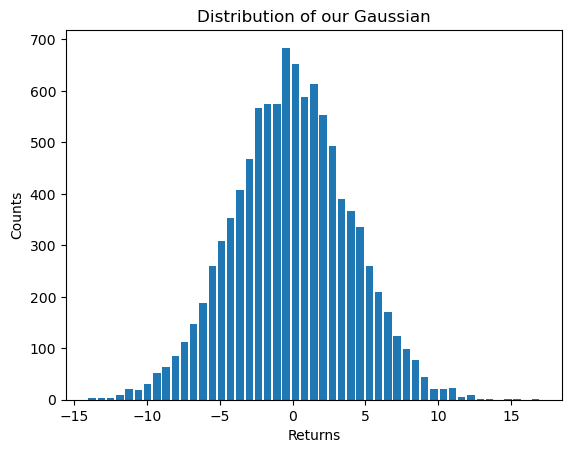

In [34]:
# Sampling 10000 random ints from a Gaussian:
mu, std = 0, 4
X = np.random.normal(mu, std, size=10000)

# Plotting the distributions:
Xmin, Xmax = np.min(X), np.max(X)

bins = np.linspace(Xmin, Xmax, 50)

hist, bin_edges = np.histogram(X, bins=bins)
width = bins[1] - bins[0]
x = (bin_edges[1:] + bin_edges[:-1])/2

fig, ax = plt.subplots()
ax.bar(x, hist, width=width*0.8)
ax.set_xlabel('Returns')
ax.set_ylabel('Counts')
ax.set_title('Distribution of our Gaussian')

In [40]:
#Cumulative average:
N = np.arange(1, 10000+1, 1)
X_avgs = np.cumsum(X)/N

#Cumulative standard error of X:
X_stds = [np.std(X[i:])/np.sqrt(i+1) for i in range(len(X))]

#Median and mean:
median, mean = np.median(X), np.mean(X)


-0.04030560378006559 -0.04030560378006559


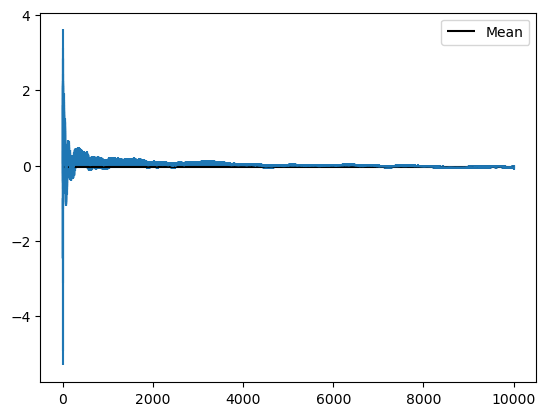

In [53]:
#PLot of cumulative average and standard error:
fig, ax = plt.subplots()
#ax.plot(N, X_avgs, )
ax.errorbar(N, X_avgs, X_stds, xlolims=True, xuplims=True)
ax.hlines(y=mean, xmin=0, xmax =10000, colors='black', label='Mean')
ax.legend()